In [147]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [148]:
# Import data
df1 = pd.read_csv("../data/processed_data/accept_downsampled_by_hardship.csv")
df1 = df1.iloc[:, 1:]
df1 = df1.dropna()
X = df1.drop("hardship", axis=1)
y = df1["hardship"]
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=150000)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.7, random_state=150000)
# Normalize training
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
# fit and transform the data
X_train = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns)
X_train = X_train.drop("id", axis=1)
X_test = X_test.drop("id", axis=1)

In [ ]:
from sklearn import svm
clf = svm.SVC()
svm = clf.fit(X_train, y_train)
y_test_predicted = list(svm.predict(X_test))
y_test_list = list(y_test)
count = 0
for i in range(len(y_test_list)):
    if y_test_list[i] == y_test_predicted[i]:
        count += 1
# accuracy
print(count/len(y_test))

In [ ]:
# Probability estimates
prob_ests = []
# Predict confidence scores for samples
conf_scores = []
col_names = []

for col_name in X_train.columns:
    X_train_tmp = X_train.drop(col_name, axis=1)
    X_test_tmp = X_test.drop(col_name, axis=1)
    clf = LogisticRegression(solver="liblinear", random_state=0).fit(X_train_tmp, y_train)
    prob_ests.append(roc_auc_score(y_test, clf.predict_proba(X_test_tmp)[:, 1]))
    conf_scores.append(roc_auc_score(y_test, clf.decision_function(X_test_tmp)))
    col_names.append(col_name)

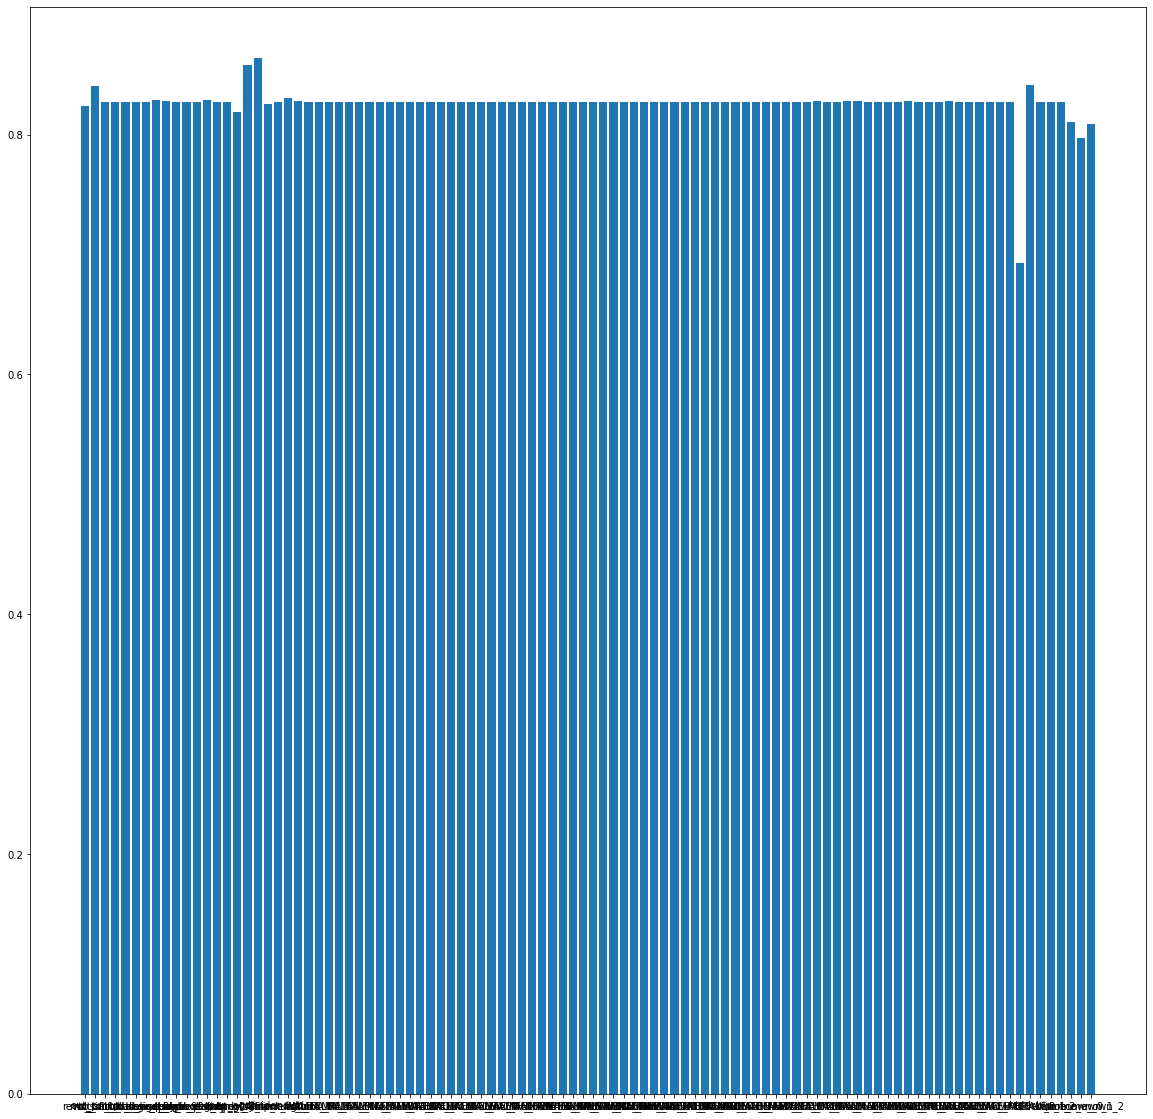

In [ ]:
#plt.bar(col_names, prob_ests)
plt.figure(figsize=(20, 20))
plt.bar(col_names, conf_scores)
plt.show()

<BarContainer object of 99 artists>

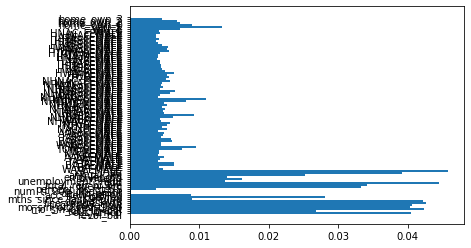

In [150]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
regr = RandomForestClassifier(max_depth=20, random_state=0)
regr.fit(X_train, y_train)
y_test_predicted = list(regr.predict(X_test))
y_test_list = list(y_test)
count = 0
for i in range(len(y_test_predicted)):
    if y_test_list[i] == y_test_predicted[i]:
        count += 1
# accuracy
regr.feature_importances_
plt.barh(X_train.columns, regr.feature_importances_)

In [151]:
importance = list(zip(X_train.columns, regr.feature_importances_))
importance.sort(key = lambda num: num[1])
importance = importance[::-1]
new_feature = importance[:30]
# pd.DataFrame(new_feature).to_csv("important_feature.csv")

In [153]:
# pd.DataFrame(importance).to_csv("random_forest_feats.csv")

In [141]:
important_features = []
for i in importance:
    important_features.append(i[0])

In [ ]:
from sklearn import svm
clf = svm.SVC()
svm = clf.fit(X_train[important_features], y_train)
y_test_predicted = list(svm.predict(X_test[important_features]))
y_test_list = list(y_test)
count = 0
for i in range(len(y_test_list)):
    if y_test_list[i] == y_test_predicted[i]:
        count += 1
# accuracy
print(count/len(y_test))

In [ ]:
from sklearn import svm
clf = svm.SVC()
svm = clf.fit(X_train, y_train)
y_test_predicted = list(svm.predict(X_test))
y_test_list = list(y_test)
count = 0
for i in range(len(y_test_predicted)):
    if y_test_list[i] == y_test_predicted[i]:
        count += 1
# accuracy
print(count/len(y_test))

In [71]:
svm.score(X_test, y_test)

0.9995617879053462